pour travailler à deux

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector

In [108]:
df = pd.read_csv('data_set/SBAnational1000.csv')
df = df.drop(columns=['Unnamed: 0', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr'], axis=1).reset_index(drop=True)
df = df.drop(columns=['CreateJob', 'RetainedJob'], axis=1).reset_index(drop=True)

X = df.drop(columns=['MIS_Status'], axis=1).reset_index(drop=True)
y = df[['MIS_Status']].reset_index(drop=True)

display(X.head(1))
display(y.head(1))

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,4,2.0,1,0,N,Y,60000.0,48000.0


,MIS_Status
0,P I F


___
# matrice de correlation

In [109]:
df_cible = df.copy()

colonnes_non_numeriques = make_column_selector(dtype_exclude=np.number)(df_cible)
label_encoder = LabelEncoder()
for colonne in colonnes_non_numeriques:
    df_cible[colonne] = label_encoder.fit_transform(df_cible[colonne])

display(df_cible.head(1))

correlation_matrix = df_cible.corr()

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,27,9,47711,13,9,451120,3,1,84,4,2.0,1,0,1,1,1,60000.0,48000.0


### TARGET

In [110]:
# Définir le seuil de corrélation
seuil = 0.1
print(f"Seuil = {seuil}")

# Créer une liste pour stocker les paires de features et leurs valeurs de corrélation
paires_features_correlation_TARGET = []

# Extraire les paires de features et leurs valeurs de corrélation UNIQUEMENT pour la target
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[abs(correlation_matrix[col]) > seuil]
    for correlated_col in correlated_cols:
        if correlated_col != col and col == 'MIS_Status':  # Pour éviter d'ajouter la corrélation de la feature elle-même et les doublons
            paires_features_correlation_TARGET.append((col, correlated_col, correlation_matrix.loc[col, correlated_col]))

# Convertir l'ensemble des paires de features uniques en un DataFrame
df_paires_features_correlation_TARGET = pd.DataFrame(list(paires_features_correlation_TARGET), columns=['Feature 1', 'Feature 2', 'Corrélation'])

# Appliquer une coloration selon la corrélation
styled_df_TARGET = df_paires_features_correlation_TARGET.style.background_gradient(cmap='coolwarm', subset=['Corrélation'])

# Afficher le DataFrame avec la coloration
display(styled_df_TARGET)

Seuil = 0.1


,Feature 1,Feature 2,Corrélation
0,MIS_Status,ApprovalDate,-0.123142
1,MIS_Status,Term,0.153630
2,MIS_Status,UrbanRural,-0.280046
3,MIS_Status,RevLineCr,-0.113193
4,MIS_Status,GrAppv,-0.125339
5,MIS_Status,SBA_Appv,-0.125981


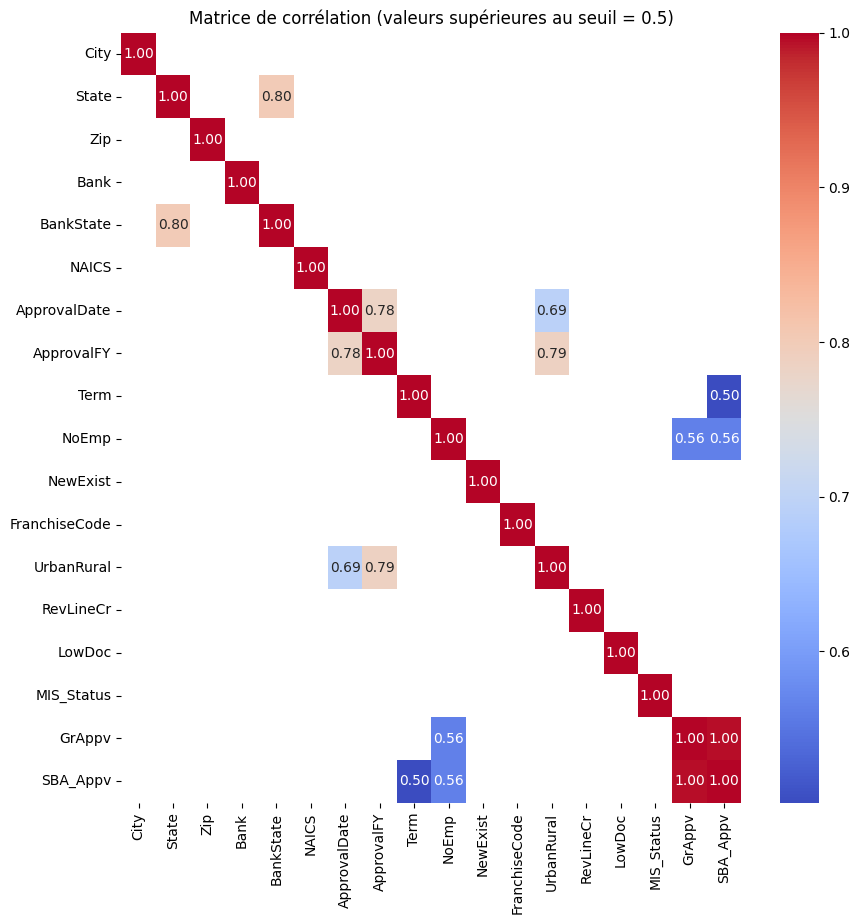

,Feature 1,Feature 2,Corrélation
0,BankState,State,0.800665
1,ApprovalDate,ApprovalFY,0.783246
2,ApprovalDate,UrbanRural,0.692719
3,ApprovalFY,UrbanRural,0.786735
4,NoEmp,SBA_Appv,0.563435
5,GrAppv,NoEmp,0.563927
6,GrAppv,SBA_Appv,0.995488
7,SBA_Appv,Term,0.502070


In [111]:
# Définir le seuil de corrélation
seuil = 0.5

# Créer une liste pour stocker les paires de features et leurs valeurs de corrélation
paires_features_correlation = []

# Extraire les paires de features et leurs valeurs de corrélation
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[abs(correlation_matrix[col]) > seuil]
    for correlated_col in correlated_cols:
        if correlated_col != col and correlated_col > col:  # Pour éviter d'ajouter la corrélation de la feature elle-même et les doublons
            paires_features_correlation.append((col, correlated_col, correlation_matrix.loc[col, correlated_col]))

# Filtrer les valeurs de la matrice de corrélation pour ne garder que celles supérieures au seuil
correlation_matrix_filtree = correlation_matrix[abs(correlation_matrix) > seuil]

# Créer une heatmap avec seaborn pour afficher les valeurs supérieures au seuil
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_filtree, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Matrice de corrélation (valeurs supérieures au seuil = {seuil})')
plt.show()

# Afficher les paires de features et leurs valeurs de corrélation
# Convertir l'ensemble des paires de features uniques en un DataFrame
df_paires_features_correlation = pd.DataFrame(list(paires_features_correlation), columns=['Feature 1', 'Feature 2', 'Corrélation'])

# Appliquer une coloration selon la corrélation
styled_df = df_paires_features_correlation.style.background_gradient(cmap='coolwarm', subset=['Corrélation'])

# Afficher le DataFrame avec la coloration
display(styled_df)

___
### analyses bivariées sur les 7 features les + corrélées

| ## | MIS_Status |  FEATURE  | corrélétion |
|---:|:-----------|----------:|-----------:|
|  0 | MIS_Status |     NAICS |  -0.107035 |
|  1 | MIS_Status | ApprovalDate |  -0.207113 |
|  2 | MIS_Status | ApprovalFY |  -0.206942 |
|  3 | MIS_Status |       Term |   0.314947 |
|  4 | MIS_Status | UrbanRural |  -0.159653 |
|  5 | MIS_Status |     GrAppv |   0.120855 |
|  6 | MIS_Status |    SBA_Appv |   0.132773 |

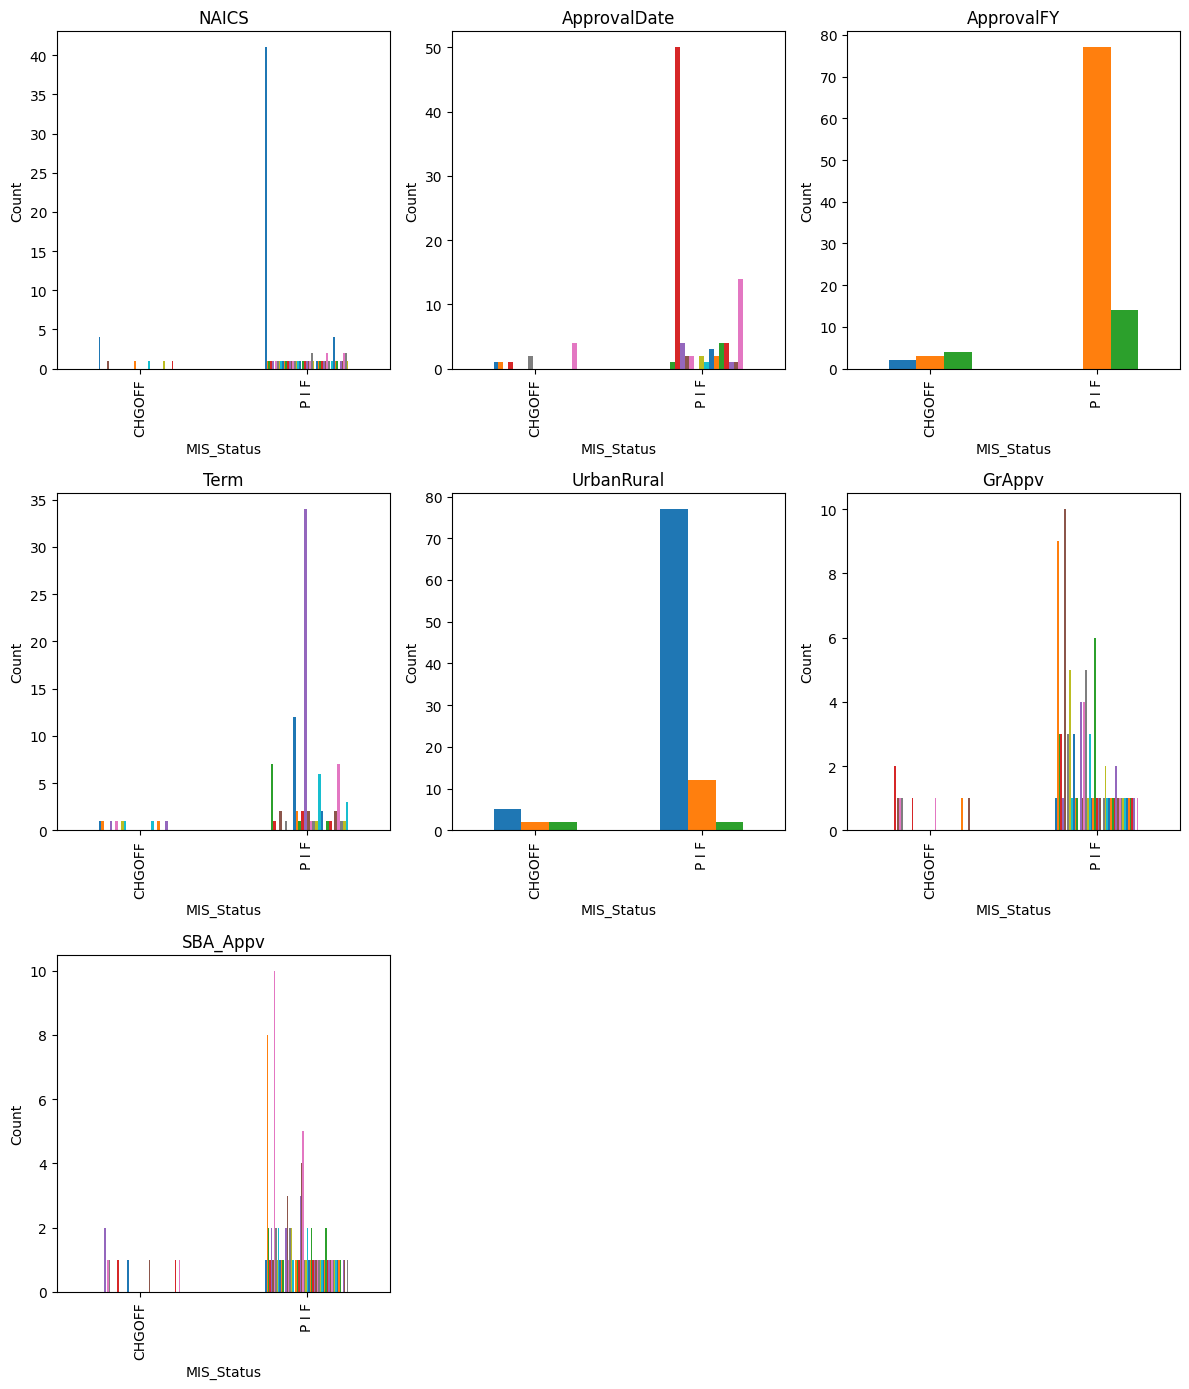

In [112]:
data1 = df.groupby(['MIS_Status', 'NAICS']).size().unstack()
data2 = df.groupby(['MIS_Status', 'ApprovalDate']).size().unstack()
data3 = df.groupby(['MIS_Status', 'ApprovalFY']).size().unstack()
data4 = df.groupby(['MIS_Status', 'Term']).size().unstack()
data5 = df.groupby(['MIS_Status', 'UrbanRural']).size().unstack()
data6 = df.groupby(['MIS_Status', 'GrAppv']).size().unstack()
data7 = df.groupby(['MIS_Status', 'SBA_Appv']).size().unstack()


# Créer une grille de sous-graphiques avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(3, 3, figsize=(12, 14))

# Plot 1
data1.plot(kind='bar', stacked=False, legend=False, ax=axes[0, 0])
axes[0, 0].set_xlabel('MIS_Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('NAICS')

# Plot 2
data2.plot(kind='bar', stacked=False, legend=False, ax=axes[0, 1])
axes[0, 1].set_xlabel('MIS_Status')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('ApprovalDate')

# Plot 3
data3.plot(kind='bar', stacked=False, legend=False, ax=axes[0, 2])
axes[0, 2].set_xlabel('MIS_Status')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('ApprovalFY')

# Plot 4
data4.plot(kind='bar', stacked=False, legend=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('MIS_Status')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Term')

# Plot 5
data5.plot(kind='bar', stacked=False, legend=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('MIS_Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('UrbanRural')

# Plot 6
data6.plot(kind='bar', stacked=False, legend=False, ax=axes[1, 2])
axes[1, 2].set_xlabel('MIS_Status')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('GrAppv')

# Plot 7
data7.plot(kind='bar', stacked=False, legend=False, ax=axes[2, 0])
axes[2, 0].set_xlabel('MIS_Status')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('SBA_Appv')

axes[2, 1].spines['top'].set_visible(False)
axes[2, 1].spines['right'].set_visible(False)
axes[2, 1].spines['bottom'].set_visible(False)
axes[2, 1].spines['left'].set_visible(False)
axes[2, 1].set_xticks([])
axes[2, 1].set_yticks([])
axes[2, 2].spines['top'].set_visible(False)
axes[2, 2].spines['right'].set_visible(False)
axes[2, 2].spines['bottom'].set_visible(False)
axes[2, 2].spines['left'].set_visible(False)
axes[2, 2].set_xticks([])
axes[2, 2].set_yticks([])

# Afficher les graphiques
plt.tight_layout()
plt.show()


In [113]:
df.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv',
       'SBA_Appv'],
      dtype='object')

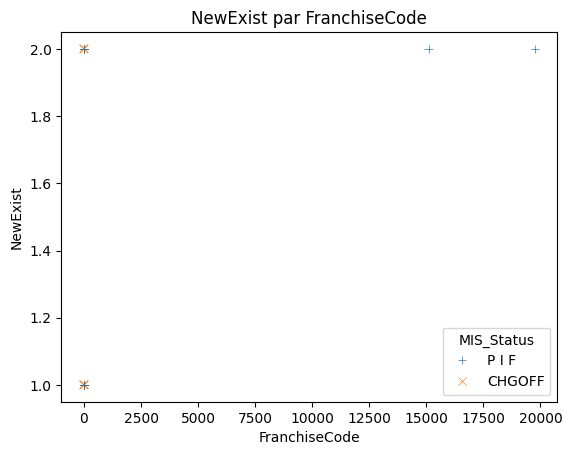

In [114]:
ll = df.columns
ll = ['MIS_Status', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'UrbanRural', 'GrAppv', 'SBA_Appv']
ll = ['MIS_Status', 'FranchiseCode', 'NewExist', 'UrbanRural', 'LowDoc', 'RevLineCr']
ll = ['MIS_Status', 'FranchiseCode', 'NewExist']
liste = []
for i in range(len(ll) - 1):
    for j in range(i + 1, len(ll)):
        if ll[i] != 'MIS_Status' and ll[j] != 'MIS_Status':
            liste.append((ll[i], ll[j]))

# liste = []
# liste.append(('UrbanRural', 'Term'))
# liste.append(('ApprovalFY', 'Term'))
# liste.append(('GrAppv', 'Term'))
# liste.append(('GrAppv', 'ApprovalFY'))
# liste.append(('GrAppv', 'ApprovalDate'))
# liste.append(('GrAppv', 'UrbanRural'))
# liste.append(('UrbanRural', 'Term'))
# liste.append(('UrbanRural', 'NAICS'))

for x, y in liste:
    sns.scatterplot(data=df, x=x, y=y, hue='MIS_Status', style='MIS_Status', markers=['+', 'x'])
    # plt.figure(figsize=(6, 6))
    plt.title(f'{y} par {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='MIS_Status')
    plt.show()

In [115]:
df['FranchiseCode'].unique()
df.query("FranchiseCode == 15100")

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
12,APEX,NC,27502,BANK OF AMERICA NATL ASSOC,NC,445299,2006-02-07,2006-01-01,162,2,2.0,15100,1,N,N,P I F,253400.0,190050.0
